In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('heart.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()
data.head(3)


 	 The data frame has 918 rows and 12 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [4]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['HeartDisease'].value_counts())



print("\n \t The data has {} Heart Disease, {} Heart Disease and {} Not Heart Disease.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 918 Heart Disease, 508 Heart Disease and 410 Not Heart Disease.


<AxesSubplot:xlabel='index', ylabel='HeartDisease'>

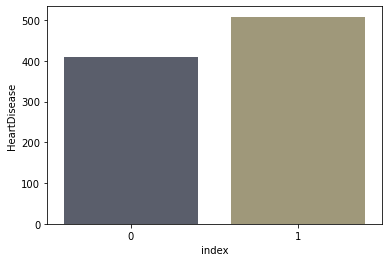

In [5]:
xx=data['HeartDisease'].value_counts().reset_index()
sns.barplot(x='index', y='HeartDisease' ,data=xx, palette='cividis')


In [6]:
features_mean= list(data.columns[:-1])

In [7]:
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

le = LabelEncoder()
data.ChestPainType = le.fit_transform(data.ChestPainType)

le = LabelEncoder()
data.RestingECG = le.fit_transform(data.RestingECG)

le = LabelEncoder()
data.ExerciseAngina = le.fit_transform(data.ExerciseAngina)

le = LabelEncoder()
data.ST_Slope = le.fit_transform(data.ST_Slope)

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

In [9]:
X = data.loc[:,features_mean]
y = data.loc[:, 'HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

In [10]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_train), y_train))

Accuracy: 84.24%
Cross validation score: 83.11% (+/- 10.09%)
Execution time: 0.067364 seconds 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       335
           1       0.87      0.88      0.88       399

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
prediction = randomForest.predict(X_test)
scores = cross_val_score(randomForest, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_train), y_train))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_train), y_train))


start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_train), y_train))

Random Forest Accuracy: 88.04%
Cross validation score: 82.67% (+/- 6.97%)
Execution time: 1.3512 seconds 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       335
           1       0.87      0.88      0.88       399

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

Extra Trees Accuracy: 88.04%
Cross validation score: 82.68% (+/- 8.39%)
Execution time: 1.0642 seconds 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734

Dedicion Tree Accuracy: 79.35%
Cross validation score: 73.74% (+/- 11.10%)
Execution time: 0.041005 seconds 

              precision 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#report
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_train), y_train))

Accuracy: 70.11%
Cross validation score: 66.22% (+/- 10.67%)
Execution time: 0.12203 seconds 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       317
           1       0.83      0.80      0.81       417

    accuracy                           0.79       734
   macro avg       0.79      0.79      0.79       734
weighted avg       0.79      0.79      0.79       734



In [13]:
import pickle
pickle.dump(randomForest, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
print(model)

RandomForestClassifier()


In [14]:
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,0,1,140,195,0,1,179,0,0.0,2
30,53,1,2,145,518,0,1,130,0,0.0,1
377,65,1,0,160,0,1,2,122,0,1.2,1
535,56,1,0,130,0,0,0,122,1,1.0,1
807,54,1,1,108,309,0,1,156,0,0.0,2


In [15]:
model.predict([[63,0,1,140,195,0,1,179,0,0.0,2]])

array([0], dtype=int64)